In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
all_data = pd.read_csv("country_rows_df.csv")

In [3]:
all_data[152:158].to_csv("region_rows.csv")

In [4]:
regions = all_data[152:158]
countries = all_data[0:152]

In [5]:
countries_measures = countries[['Name', 'Infant mortality, deaths/1,000 live births*', 
                                'Country credit rating, 0–100 (best)*', 
         'Life expectancy, years*', 'GDP (PPP$ billions)*', 
                                'Imports as a percentage of GDP*',
        'Exports as a percentage of GDP*']].set_index('Name')

countries_measures.columns = ['Infant mortality', 'Credit Rating', 'Life expectancy', 
                              'GDP', 
                           'Imports% of GPD', 'Exports% of GPD']

countries_measures = countries_measures.dropna()

countries_measures.head()


,Infant mortality,Credit Rating,Life expectancy,GDP,Imports% of GPD,Exports% of GPD
Name,,,,,,
Albania,12.5,39.250000,78.014465,34.154999,52.617275,37.709357
Algeria,21.9,47.804526,75.042534,612.513000,35.478399,20.139221
Argentina,11.1,27.710565,76.334221,874.072022,13.768635,12.884663
Armenia,12.6,36.939397,74.797119,25.783001,47.577484,32.010858
Australia,3.0,90.011364,82.451218,1187.321045,19.987307,19.337074


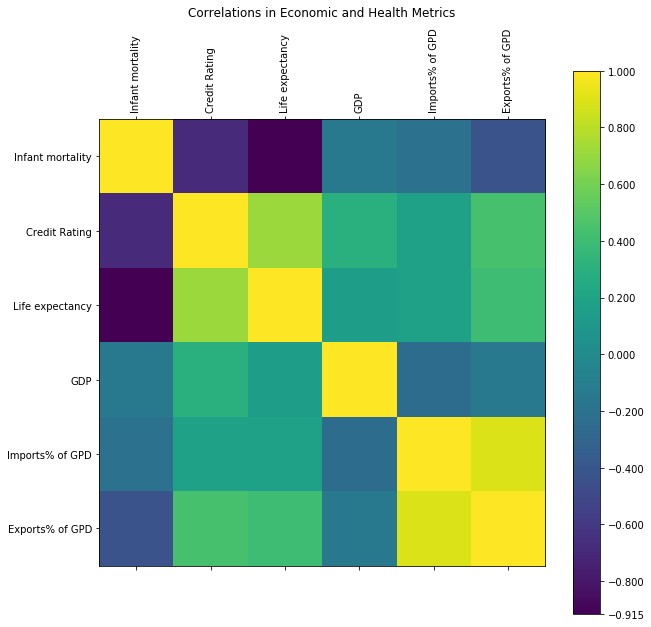

In [13]:
import matplotlib.pyplot as plt

corr = countries_measures.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
figure_title = 'Correlations in Economic and Health Metrics\n\n'
plt.title(figure_title, y=1.15)
cax = ax.imshow(corr, interpolation="nearest")
fig.colorbar(cax, ticks=[-.915, -.8, -.6, -.4, -.2, 0,.2,.4,.6,.8,1])
